In [1]:
# import needed libraries
import os
import pickle
import sys
from collections import OrderedDict

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# path of local project
folder_path = "/home/jiaxiangyi/Documents/rvesimulator"
sys.path.insert(0, folder_path)

# import local packages and functions
import rvesimulator
from rvesimulator.design_of_experiment.path_sampler import StrainPathSampler
from rvesimulator.design_of_experiment.samplers import FixNumberSampler


# The first way of generating strain path 



In [2]:
# design variable is set to be the number of control points for loads path
doe_variables = OrderedDict({"num_control": 7, "num_increment": 100})

# define number of samples, which means three different path will be generated
num_points = 3

# define the information of outputs
name_outputs = ["stress", "strain", "plastic_energy"]
doe_sampler = FixNumberSampler()
doe_sampler.sampling(
    num_samples=num_points,
    design_space=doe_variables,
    out_names=name_outputs,
    seed=123456,
)
data = doe_sampler.data

print(data)

{'samples':    num_control  num_increment
0          7.0          100.0
1          7.0          100.0
2          7.0          100.0, 'responses':   stress strain plastic_energy
0    NaN    NaN            NaN
1    NaN    NaN            NaN
2    NaN    NaN            NaN}


## 2D case (FEM)

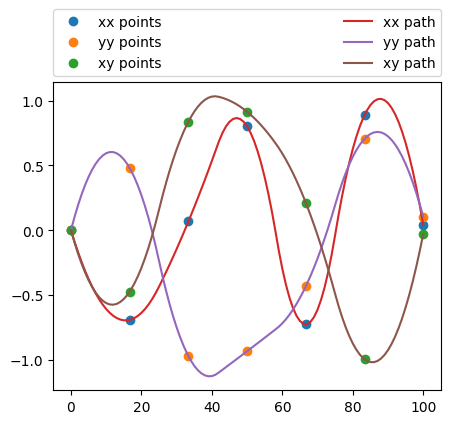

In [3]:
# 2D case 
# initialize the strain path generator
strain_path_generator = StrainPathSampler(seed=12, num_dim=3)
data_2d = strain_path_generator.get_strain_path(
    data=data.copy(), arg_name="loads_path", interploation_method="quadratic"
)
strain_path_generator.plot_path(iteration=0)

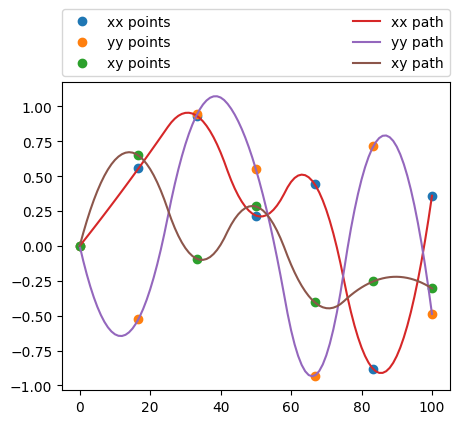

In [4]:
strain_path_generator.plot_path(iteration=1)

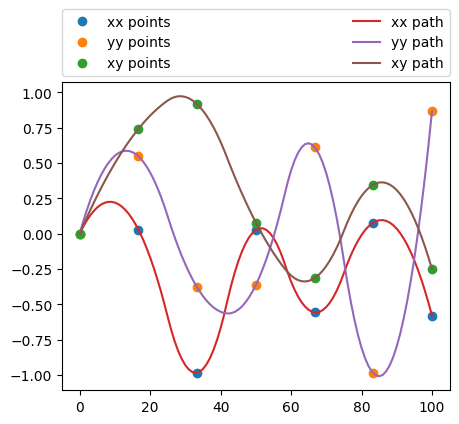

In [5]:
strain_path_generator.plot_path(iteration=2)

## 3D case (FEM) 

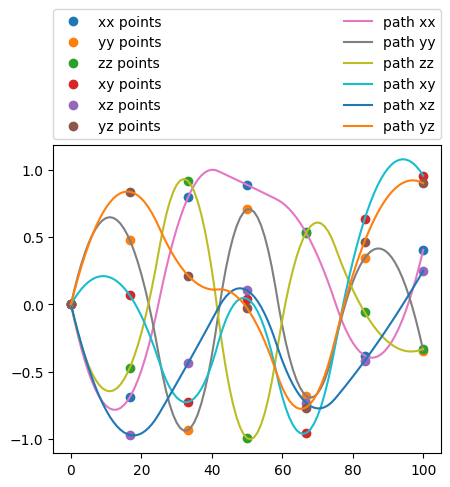

In [6]:
# 2D case 
# initialize the strain path generator
strain_path_generator_3d = StrainPathSampler(seed=12, num_dim=6)
data_3d = strain_path_generator_3d.get_strain_path(
    data=data.copy(), arg_name="loads_path", interploation_method="quadratic"
)
strain_path_generator_3d.plot_path(iteration=0)

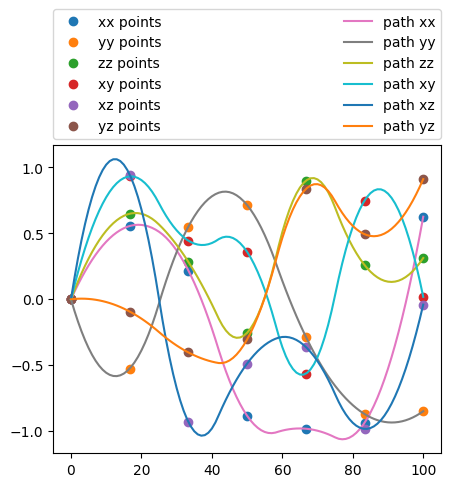

In [7]:
strain_path_generator_3d.plot_path(iteration=1)

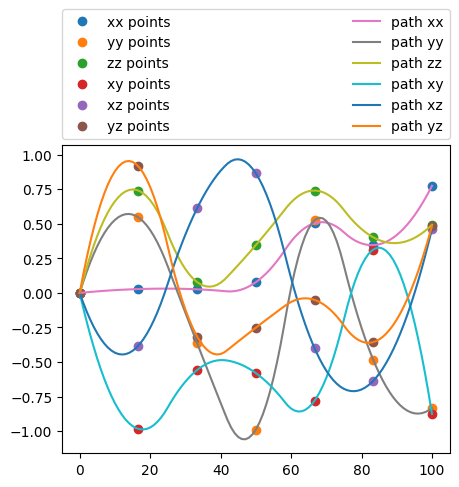

In [8]:
strain_path_generator_3d.plot_path(iteration=2)

# second way of generating those curves 

In [9]:
# 2d FEM 
strain_path_generatpr_test= StrainPathSampler() 
x_control, y_control = strain_path_generatpr_test.generate_control_points(seed=123, num_control=7,num_increment=100, num_dim=3)
strain_path = strain_path_generatpr_test.interpolation(x_control=x_control,y_control=y_control, num_increment=100, interploation_method="quadratic")

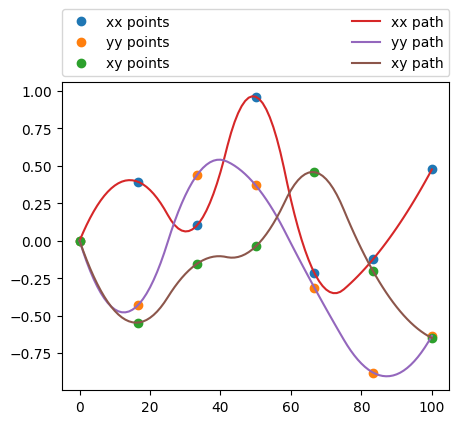

In [10]:
strain_path_generatpr_test.plot_path(internal=False,x_control=x_control, y_control=y_control,num_increment=100, path=strain_path )

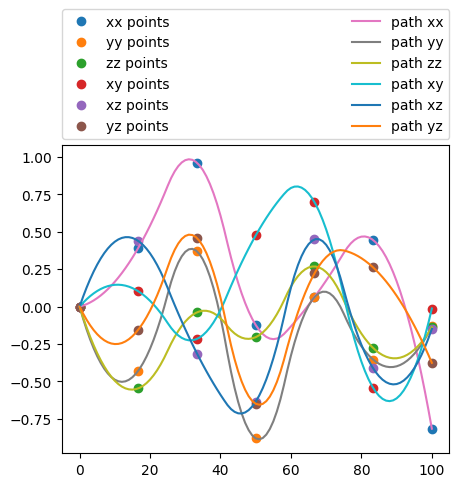

In [11]:
# 3d FEM 
strain_path_generatpr_test= StrainPathSampler() 
x_control, y_control = strain_path_generatpr_test.generate_control_points(seed=123, num_control=7,num_increment=100, num_dim=6)
strain_path = strain_path_generatpr_test.interpolation(x_control=x_control,y_control=y_control, num_increment=100, interploation_method="quadratic")
strain_path_generatpr_test.plot_path(internal=False,x_control=x_control, y_control=y_control,num_increment=100, path=strain_path )